<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour_of_day  3547 non-null   int64  
 1   cash_type    3547 non-null   object 
 2   money        3547 non-null   float64
 3   coffee_name  3547 non-null   object 
 4   Time_of_Day  3547 non-null   object 
 5   Weekday      3547 non-null   object 
 6   Month_name   3547 non-null   object 
 7   Weekdaysort  3547 non-null   int64  
 8   Monthsort    3547 non-null   int64  
 9   Date         3547 non-null   object 
 10  Time         3547 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 304.9+ KB
Mean: 31.64521567521849
Mode: [35.76]
Median: 32.82
STD: 4.877753703590957
CV: 15.413874102336258


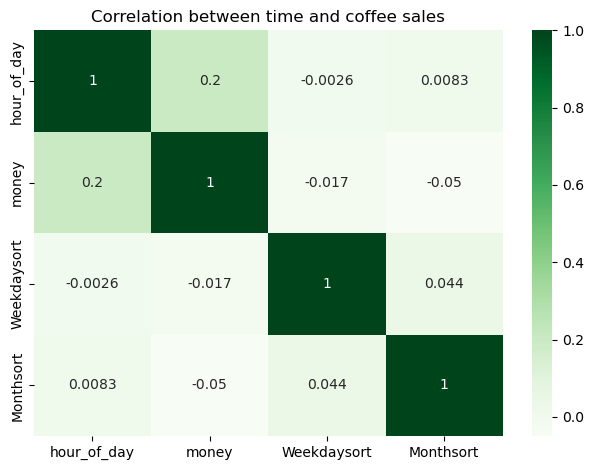

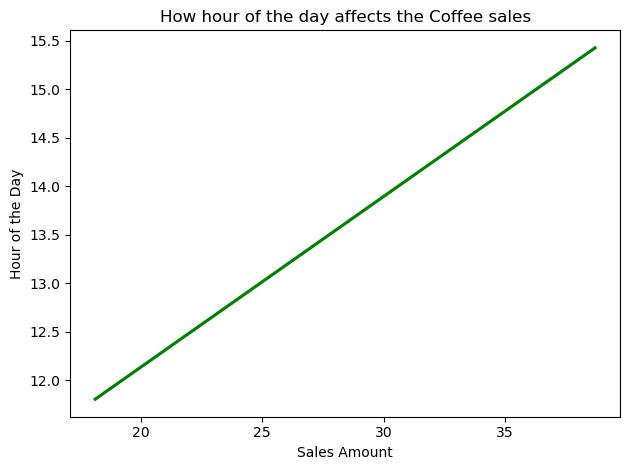

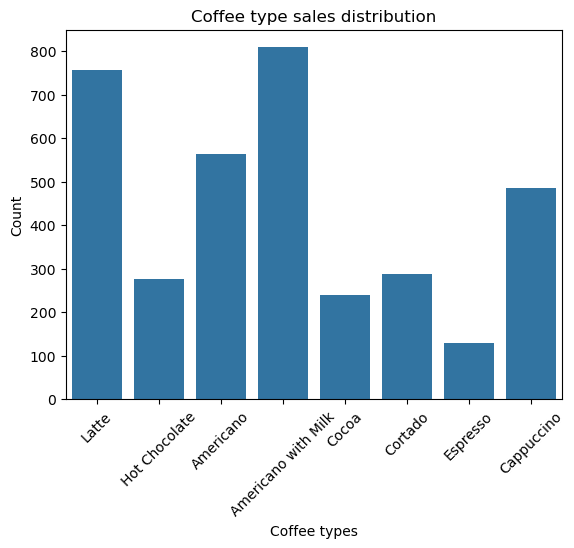

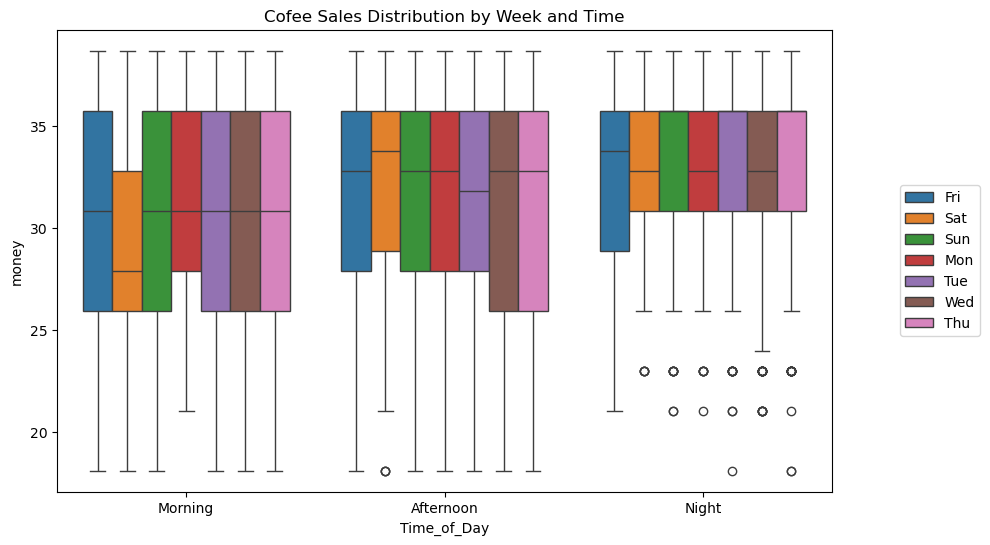

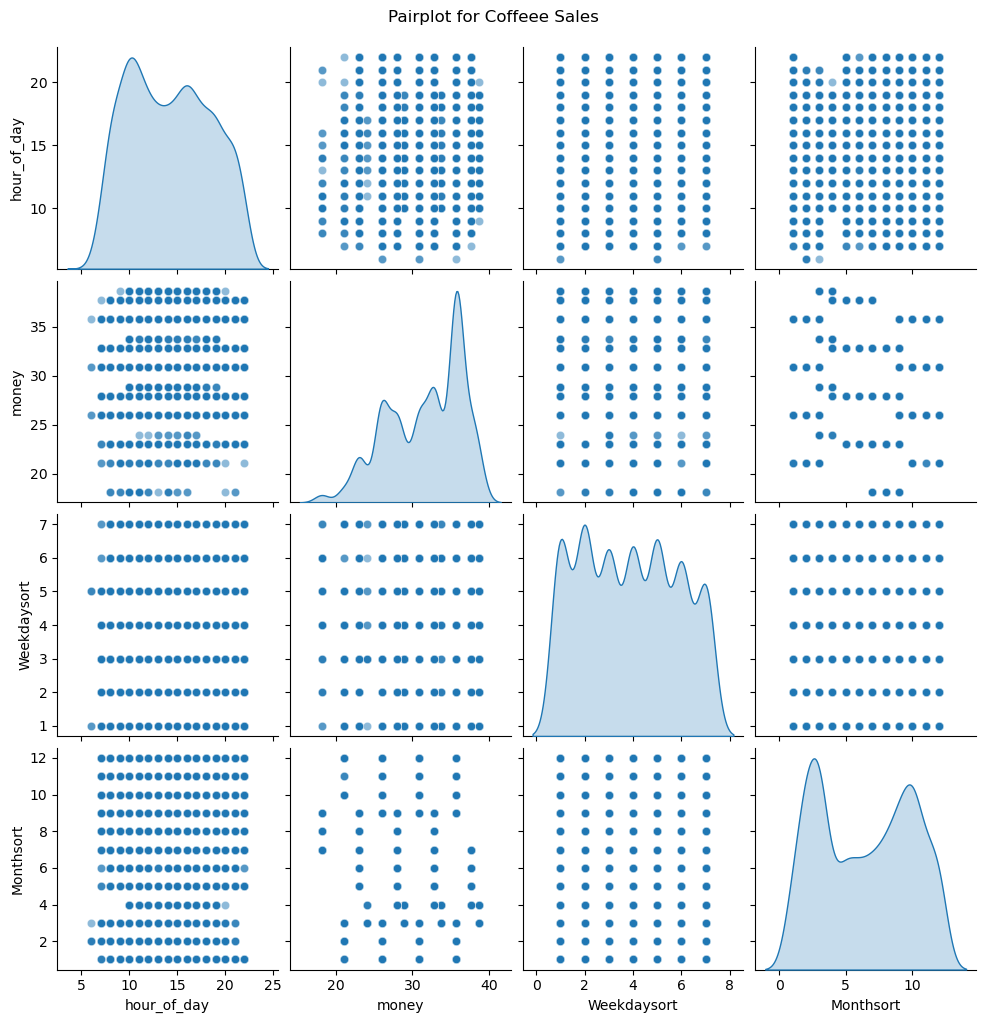

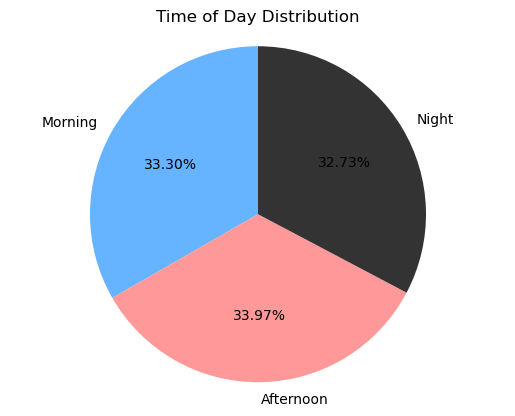

In [101]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv(r"C:\Users\BRENDA\Downloads\Coffe_sales.csv")
df.info()
print("Mean:",df['money'].mean())
print("Mode:", df['money'].mode().tolist())
print("Median:", df['money'].median())
print("STD:", df['money'].std())
print("CV:", (df['money'].std()/df['money'].mean())*100)
#visualize correlation
corr = df[['hour_of_day','money','Weekdaysort','Monthsort']].corr()
sns.heatmap(corr, annot = True, cmap = 'Greens')
plt.title("Correlation between time and coffee sales")
plt.tight_layout()
plt.show()
#regplot to show correlation btn sales and hourofday
sns.regplot(x= 'money',y='hour_of_day',data = df, scatter = False, line_kws={'color':'green'}, ci=None)
plt.title("How hour of the day affects the Coffee sales")
plt.xlabel('Sales Amount')
plt.ylabel('Hour of the Day')
plt.tight_layout()
plt.show()
#lets understand the coffeetypes sales using a countplot
sns.countplot(x = 'coffee_name', data =df)
plt.title('Coffee type sales distribution')
plt.xlabel('Coffee types')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
#visualize a boxplot
plt.figure(figsize=(10,6))
sns.boxplot(x='Time_of_Day',y='money', hue = 'Weekday', data =df)
plt.title("Cofee Sales Distribution by Week and Time")
plt.legend(loc="center right", bbox_to_anchor = (1.2,0.5))
plt.show()
#pairplot to see the relationship btn variables
figure = sns.pairplot(df[['hour_of_day','money','Weekdaysort','Monthsort']], diag_kind = 'kde', plot_kws={'alpha':0.5})
figure.fig.suptitle("Pairplot for Coffeee Sales", y=1.02)
plt.show()
#pie chart to visualize time of day
labels = ['Morning', 'Afternoon', 'Night']
colors = ['#66b3ff', '#ff9999', '#333333']
td = df['Time_of_Day'].value_counts()
order = [td.get(label,0) for label in labels]
plt.pie(order, labels=labels, colors=colors, autopct='%1.2f%%', startangle = 90)
plt.title("Time of Day Distribution")
plt.axis('equal')
plt.show()